1. **Data Setup and Exploring**   

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

In [ ]:
train_data=pd.read_csv('/train.csv')
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
def shape(data):
    return f'This data contains {data.shape[0]} rows and {data.shape[1]} columns.'
print(shape(train_data))

This data contains 15991 rows and 18 columns.


In [ ]:
def check_null(data):
    if data.isnull().sum().sum()!=0:
        print('The data contain null values that are distributed as follows:')
        return data.isnull().sum()
    else:
        return 'There are no missing values in this data.'
print(check_null(train_data))

The data contain null values that are distributed as follows:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             1
CH2O                              1
SCC                               1
FAF                               1
TUE                               1
CALC                              1
MTRANS                            1
NObeyesdad                        1
dtype: int64


In [ ]:
def check_duplicates(data):
    if data.duplicated().sum().sum()!=0:
        return f'The data contains {data.duplicated.sum().sum()} duplicated records.'
    else:
        return 'There are no duplicated records in this data.'
print(check_duplicates(train_data))

There are no duplicated records in this data.


In [ ]:
def statistics(data):
    return data.describe()
statistics(train_data)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15991.000000,15991.000000,15991.000000,15991.000000,15991.000000,15991.000000,15990.000000,15990.000000,15990.000000
mean,7995.000000,23.810758,1.700062,87.806757,2.442966,2.760779,2.028730,0.978668,0.614111
std,4616.348413,5.656089,0.087531,26.364658,0.531216,0.705881,0.607026,0.836427,0.602104
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3997.500000,20.000000,1.631547,66.000000,2.000000,3.000000,1.796376,0.007050,0.000000
50%,7995.000000,22.771001,1.700000,84.000000,2.342323,3.000000,2.000000,1.000000,0.568668
75%,11992.500000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.583832,1.000000
max,15990.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
def series_distribution(data,target):
   return data[target].value_counts()
series_distribution(train_data,'NObeyesdad')

,count
NObeyesdad,
Obesity_Type_III,3063
Obesity_Type_II,2482
Normal_Weight,2405
Obesity_Type_I,2282
Overweight_Level_II,1928
Insufficient_Weight,1922
Overweight_Level_I,1908


In [ ]:
def info(data):
    return data.info()
info(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15991 entries, 0 to 15990
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15991 non-null  int64  
 1   Gender                          15991 non-null  object 
 2   Age                             15991 non-null  float64
 3   Height                          15991 non-null  float64
 4   Weight                          15991 non-null  float64
 5   family_history_with_overweight  15991 non-null  object 
 6   FAVC                            15991 non-null  object 
 7   FCVC                            15991 non-null  float64
 8   NCP                             15991 non-null  float64
 9   CAEC                            15991 non-null  object 
 10  SMOKE                           15990 non-null  object 
 11  CH2O                            15990 non-null  float64
 12  SCC                             

In [ ]:
dicrete_col=[col for col in train_data.columns if train_data[col].dtype=='int64']
continuous_col=[col for col in train_data.columns if train_data[col].dtype=='float64']
categorical_col=[col for col in train_data.columns if train_data[col].dtype=='object']

2. **Data Visualizing**

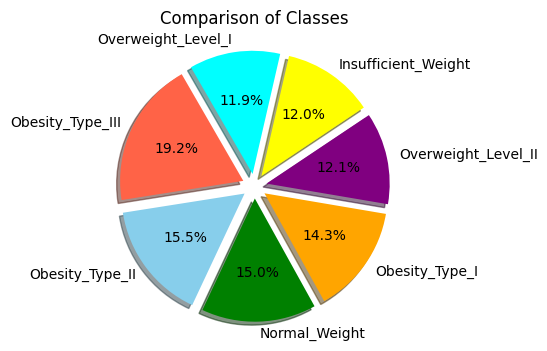

In [ ]:
target='NObeyesdad'
classes=train_data[target].value_counts()
labels = classes.index
plt.figure(figsize=(4,4))
plt.pie(classes,labels=labels,autopct='%1.1f%%',startangle=120,shadow = True,
        explode = [0.1] * len(classes),
        colors=['tomato', 'skyblue', 'green', 'orange', 'purple', 'yellow', 'cyan']
       )
plt.title('Comparison of Classes')
plt.show()

In [ ]:
def crosstab_plot(data,target,column,colors):
    plt.figure(figsize=(8,8))
    crosstab=pd.crosstab(columns=data[column],index=data[target])
    crosstab.plot(kind='bar',color=colors,
              legend=True,stacked=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column} by NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 800x800 with 0 Axes>

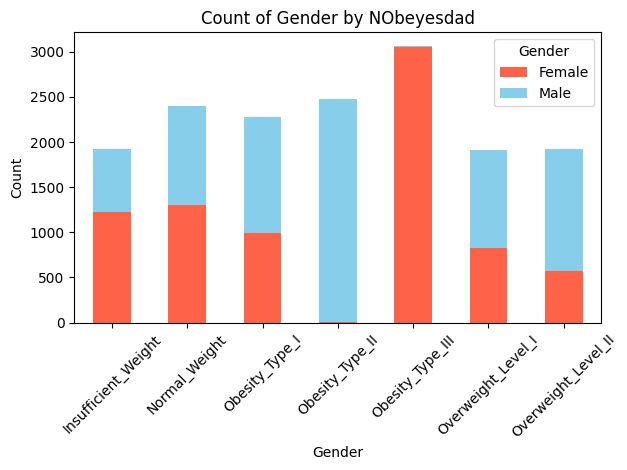

<Figure size 800x800 with 0 Axes>

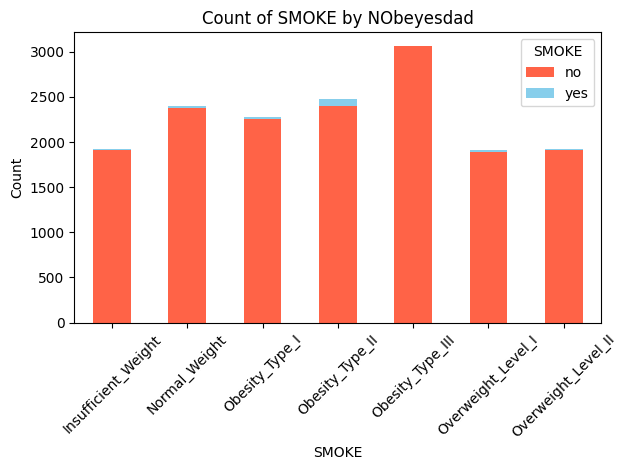

<Figure size 800x800 with 0 Axes>

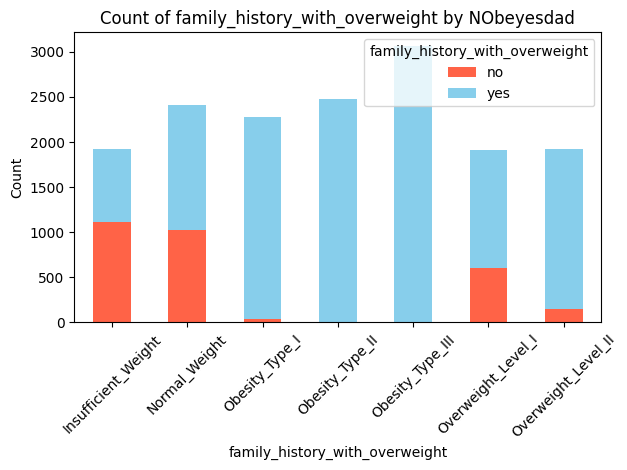

<Figure size 800x800 with 0 Axes>

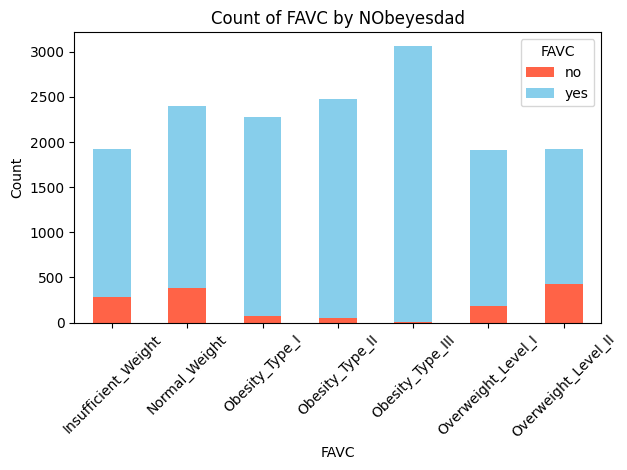

<Figure size 800x800 with 0 Axes>

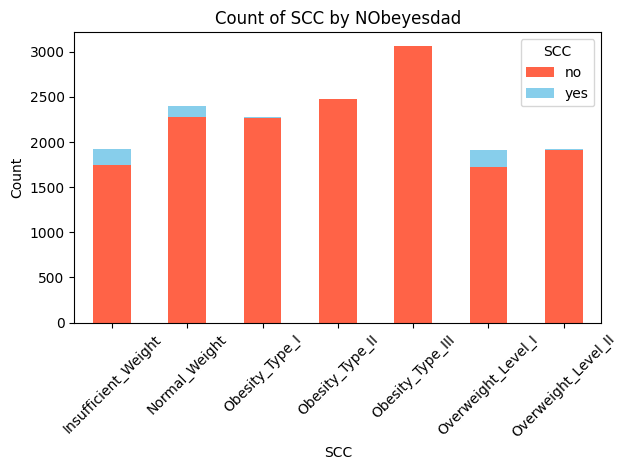

<Figure size 800x800 with 0 Axes>

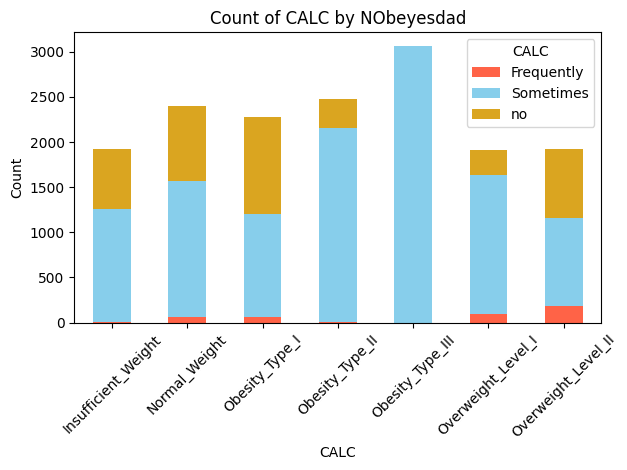

<Figure size 800x800 with 0 Axes>

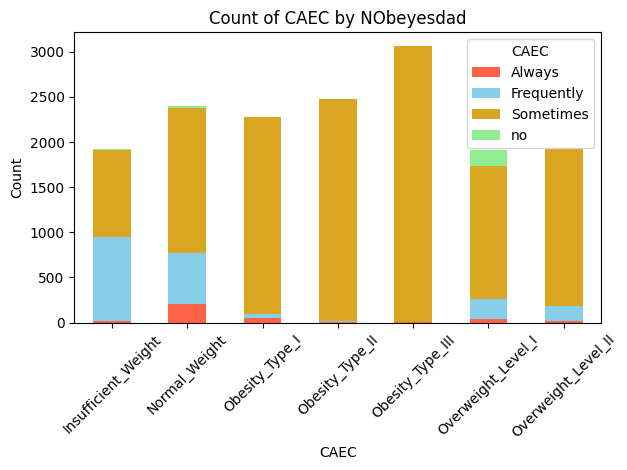

<Figure size 800x800 with 0 Axes>

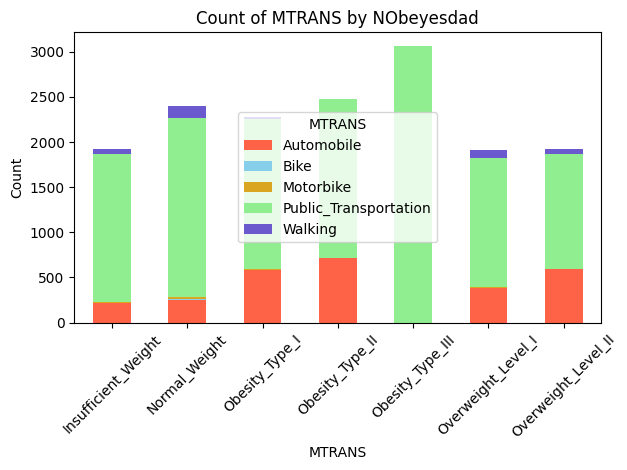

In [ ]:
crosstab_plot(train_data,target,'Gender',['tomato','skyblue'])
crosstab_plot(train_data,target,'SMOKE',['tomato','skyblue'])
crosstab_plot(train_data,target,'family_history_with_overweight',['tomato','skyblue'])
crosstab_plot(train_data,target,'FAVC',['tomato','skyblue'])
crosstab_plot(train_data,target,'SCC',['tomato','skyblue'])
crosstab_plot(train_data,target,'CALC',['tomato','skyblue','goldenrod'])
crosstab_plot(train_data,target,'CAEC',['tomato','skyblue','goldenrod', 'lightgreen'])
crosstab_plot(train_data,target,'MTRANS',['tomato','skyblue','goldenrod', 'lightgreen', 'slateblue'])

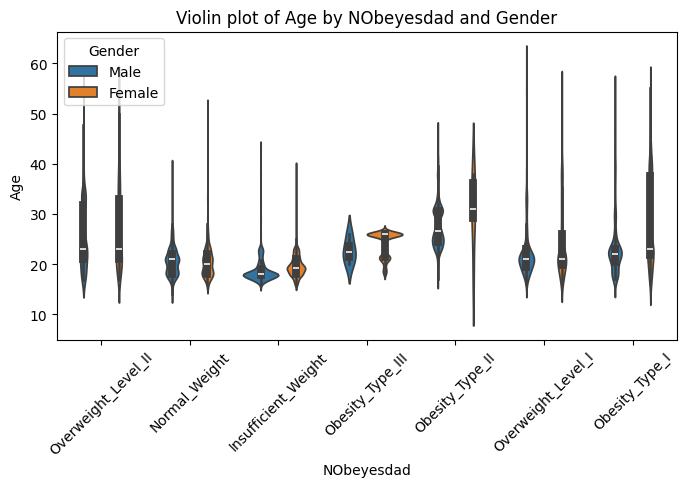

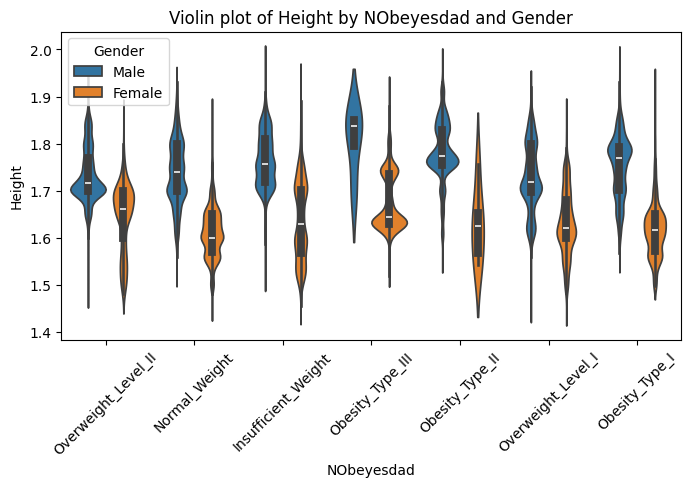

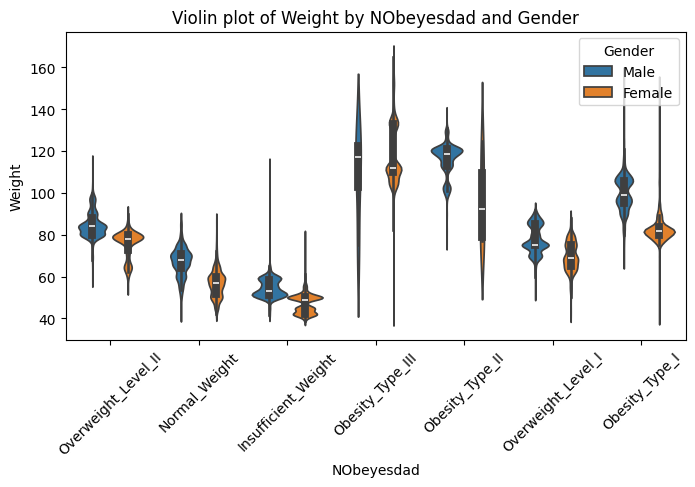

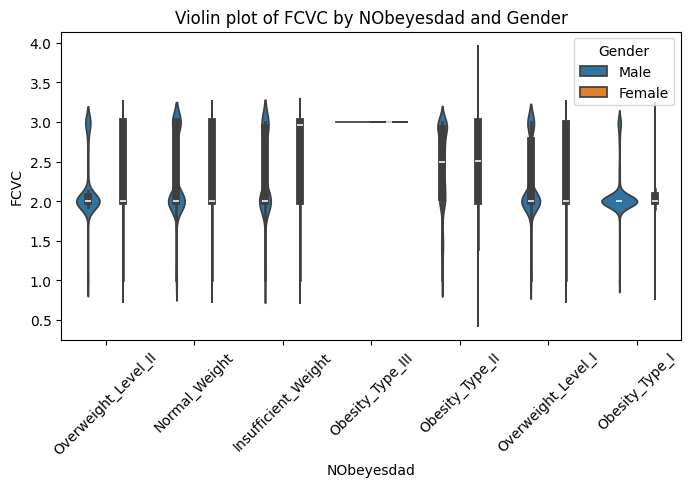

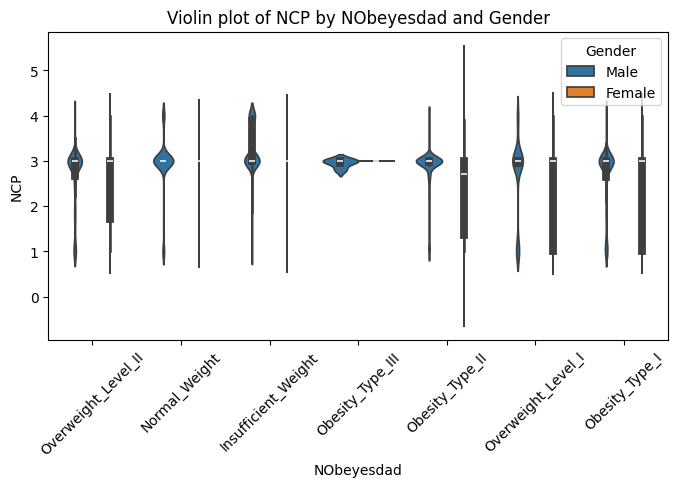

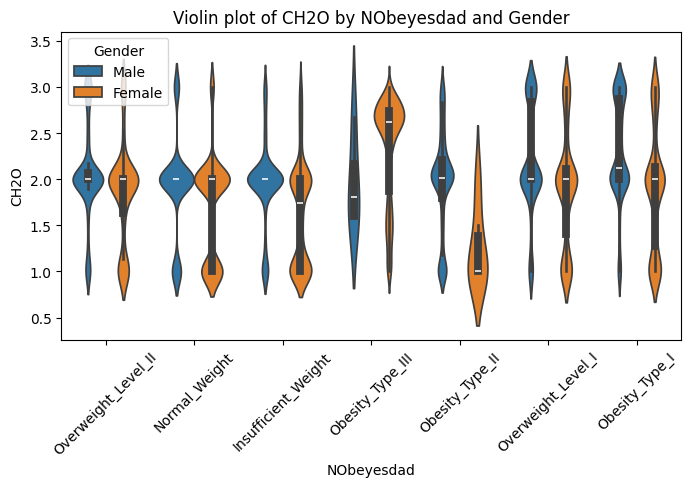

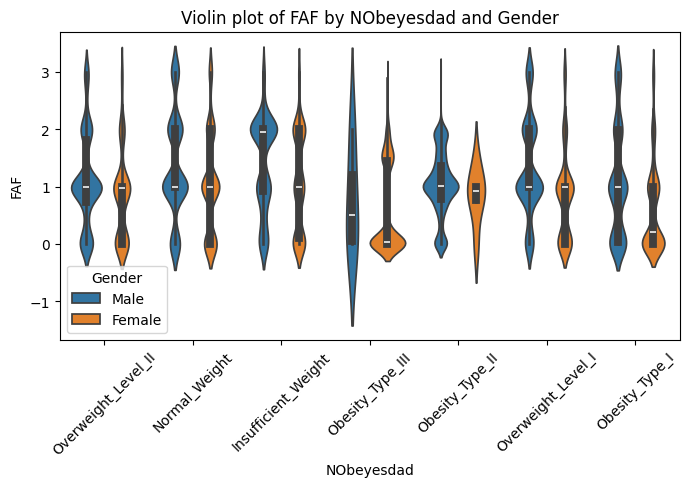

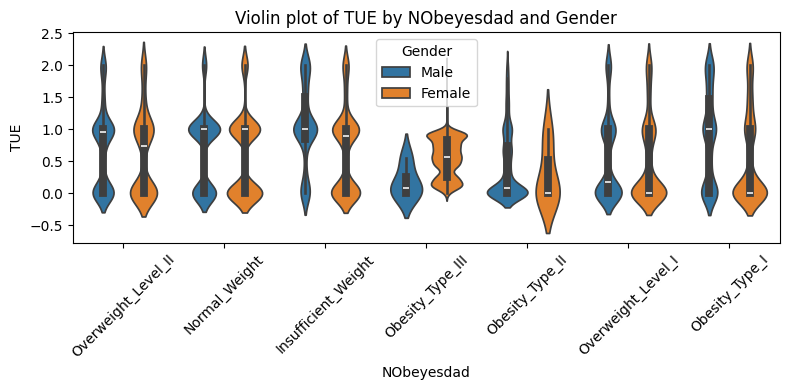

In [ ]:
for col in continuous_col:
    plt.figure(figsize=(8,4))
    sns.violinplot(x=target, y=col, hue="Gender", data=train_data, split=False)
    plt.title(f'Violin plot of {col} by {target} and Gender')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def histo_plot(data):
    plt.figure(figsize=(10,10))
    for i, column in enumerate(continuous_col):
      plt.subplot(4, 2, i + 1)
      sns.histplot(data[column], bins=15, kde=True, edgecolor='black')
      plt.xlabel('Values')
      plt.ylabel('Count')
      plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()


In [ ]:
obese_group = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I']
non_obese_group = ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Overweight_Level_I']
obese_group = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I']
non_obese_group = ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Overweight_Level_I']
obese_data = train_data[train_data['NObeyesdad'].isin(obese_group)]
non_obese_data = train_data[train_data['NObeyesdad'].isin(non_obese_group)]

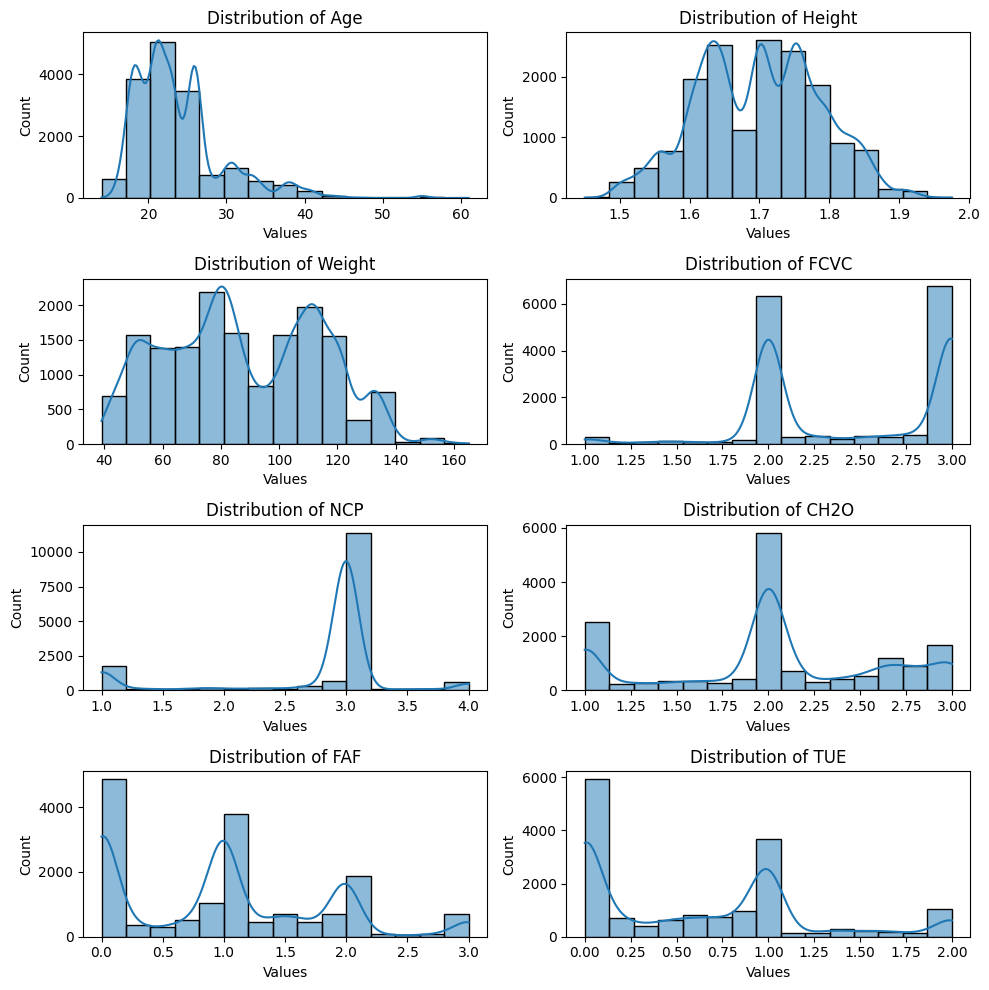

In [ ]:
histo_plot(train_data)

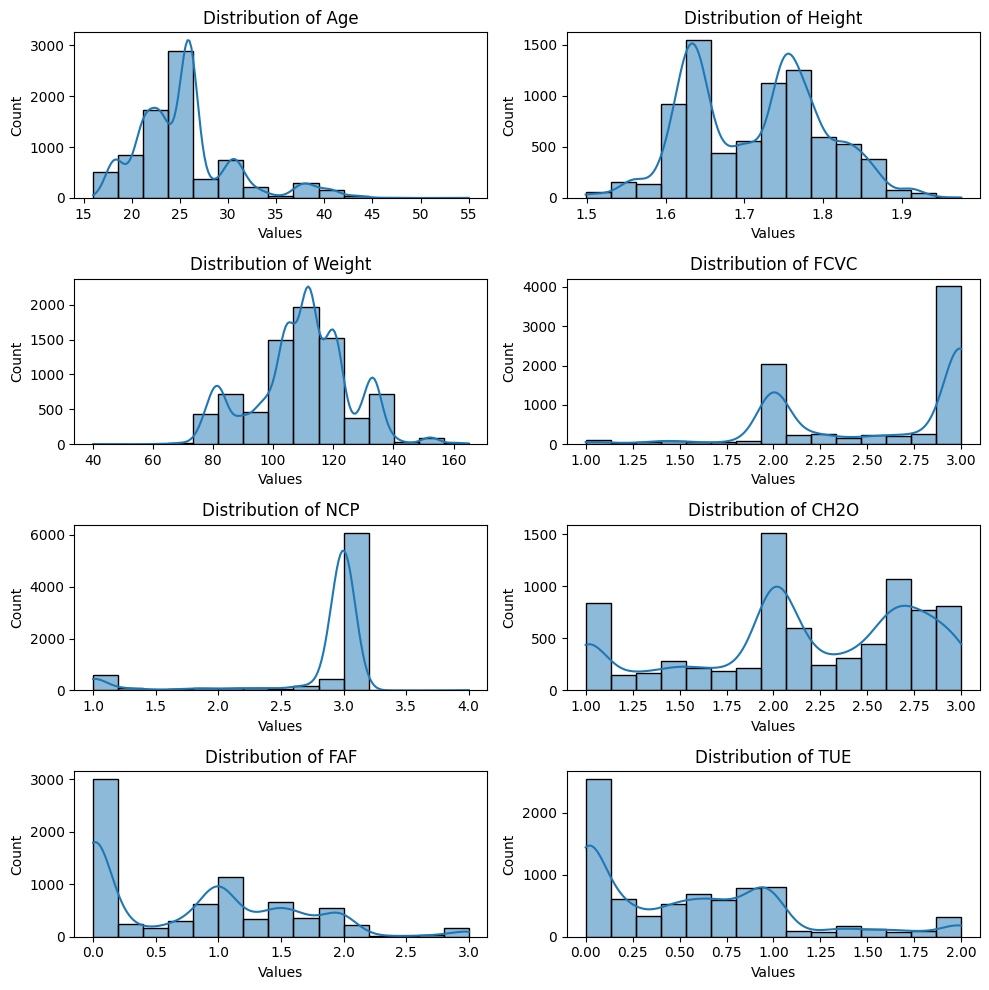

In [ ]:
histo_plot(obese_data)

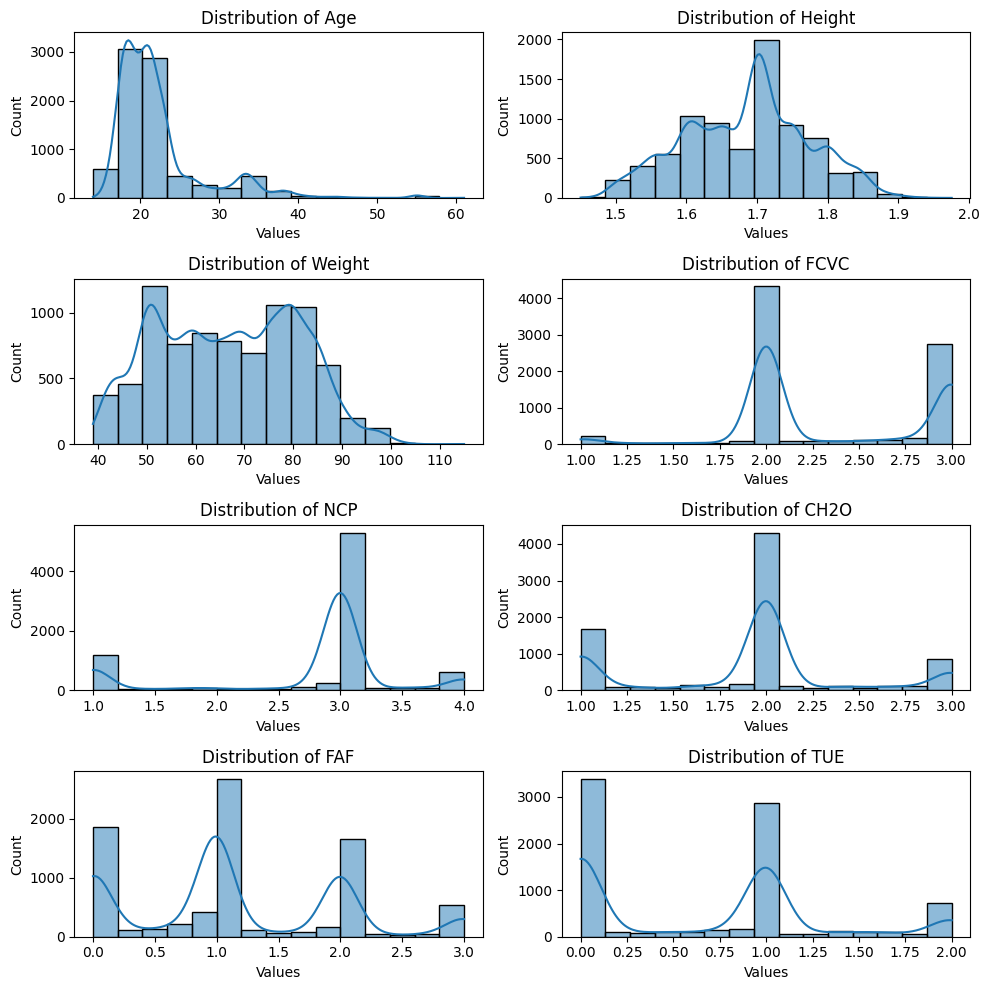

In [ ]:
histo_plot(non_obese_data)

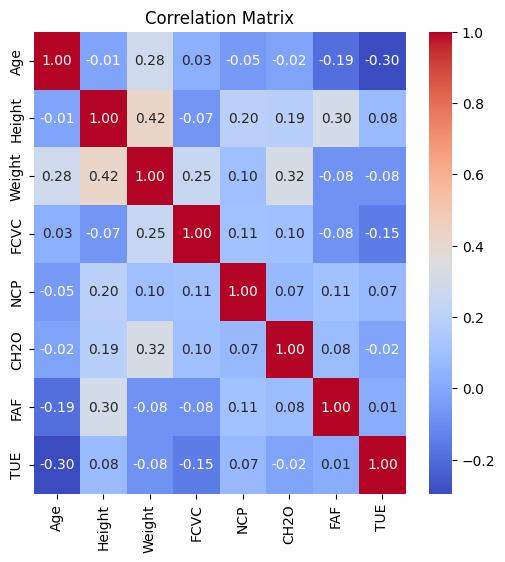

In [ ]:
correlation_matrix = train_data[continuous_col].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()

3.**Data Preprocessing**

In [ ]:
encoder=LabelEncoder()
def encode(data,columns_list):
    for column in categorical_col:
        data[column]=encoder.fit_transform(data[column])
encode(train_data,categorical_col)

In [ ]:
scaler=MinMaxScaler((-1,1))
def scale(x):
    scaled_x=scaler.fit_transform(x)
    return scaled_x

In [ ]:
x=scale(train_data.drop(['id','NObeyesdad'],axis=1).values)
y=train_data['NObeyesdad'].values

In [ ]:
seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=seed)

4. **Modeling**

In [ ]:
parameters = {
    'LogisticRegression': {
        'C': [0.1, 1, 5, 10, 50, 100],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.1, 1, 2, 5, 10, 15, 25],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 210, 250, 300, 350, 400]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 170, 200, 230, 250, 300]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
        'learning_rate': [0.01, 0.1, 0.5, 1,1.5, 2]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10, 15, 20, 30,35,40],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'XGBClassifier': {
        'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
        'n_estimators': [50, 100, 150, 200, 250, 300, 350]
    }
}

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [ ]:
results =list()
for model_name, model in models.items():
    print(f"Grid searching for {model_name}")
    param_grid = parameters[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(x_train,y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    results.append({'Model': model_name, 'Best Params': best_params, 'Best Accuracy': best_accuracy})
results_df= pd.DataFrame(results)

Grid searching for LogisticRegression


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [ ]:
results_df.head()

NameError: name 'results_df' is not defined

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]
styled_df = results_df.head().style.apply(highlight_max, subset=['Best Accuracy'])
styled_df

In [ ]:
ForestClassifier=RandomForestClassifier(n_estimators=170)
ForestClassifier.fit(x_train,y_train)

In [ ]:
y_pred=ForestClassifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ForestClassifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_data=pd.read_csv('test.csv')
test_data.head()

In [ ]:
categorical_col=[col for col in test_data.columns if test_data[col].dtype=='object']
encode(test_data,categorical_col)

In [ ]:
x=scale(test_data.drop(['id'],axis=1).values)
y_hat=ForestClassifier.predict(x)
submission=pd.DataFrame({'id':test_data['id'],'NObeyesdad':y_hat}).astype('int64')
submission.head()

In [ ]:
submission['NObeyesdad']=submission['NObeyesdad'].map(
    {1:'Normal_Weight',5:'Overweight_Level_I',6:'Overweight_Level_II',4:'Obesity_Type_I',
     3:'Obesity_Type_II',2:'Obesity_Type_III',0:'Insufficient_Weight'})

In [ ]:
submission.head()

In [ ]:
submission.to_csv('SubmissionData.csv',index=False)